# Week 7: Supervised Machine Learning (Part II)

### Logistic regression

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [3]:
from sklearn.linear_model import LogisticRegression

labeled_images = pd.read_csv('digits_train.csv')

#select images features from the second column to the last column, and only the first 2000 smaples(rows).
X = labeled_images.iloc[:2000,1:]
#select the first column which is the label, or the digit, and only the first 2000 smaples(rows).
y = labeled_images.iloc[:2000,:1].squeeze()# with .squeeze(), the pandas one column dataframe is turned into a series 
X_train,X_test,y_train,y_test=train_test_split(X, y, train_size=0.8, random_state=0)

clf = LogisticRegression().fit(X_train, y_train)
print('Logistic regression score (training): {:.3f}'
     .format(clf.score(X_train, y_train)))
print('Logistic regression score (test): {:.3f}'
     .format(clf.score(X_test, y_test)))

C:\Users\micha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Logistic regression score (training): 1.000
Logistic regression score (test): 0.835


#### Logistic regression regularization: C parameter

In [4]:
for this_C in [0.01,0.1, 1,10,50, 100]:
    clf = LogisticRegression(C=this_C).fit(X_train, y_train)
    print('Logistic regression C={0} R-squared score (training): {1:.3f}'
     .format(this_C,clf.score(X_train, y_train)))
    print('Logistic regression C={0} R-squared score (test): {1:.3f}'
     .format(this_C, clf.score(X_test, y_test)))

Logistic regression C=0.01 R-squared score (training): 1.000
Logistic regression C=0.01 R-squared score (test): 0.845
Logistic regression C=0.1 R-squared score (training): 1.000
Logistic regression C=0.1 R-squared score (test): 0.835
Logistic regression C=1 R-squared score (training): 1.000
Logistic regression C=1 R-squared score (test): 0.835
Logistic regression C=10 R-squared score (training): 1.000
Logistic regression C=10 R-squared score (test): 0.828
Logistic regression C=50 R-squared score (training): 1.000
Logistic regression C=50 R-squared score (test): 0.828
Logistic regression C=100 R-squared score (training): 1.000
Logistic regression C=100 R-squared score (test): 0.828


### Let's Try PCA n=[30,50,70]

In [5]:
from sklearn.decomposition import PCA
for n_c in [30,50,70]:
    pca=PCA(n_components=n_c, whiten=True)
    pca.fit(X_train)
    X_train_pca=pca.transform(X_train) #pca transform on training data
    X_test_pca=pca.transform(X_test) #you have to do the same transformation on test data
    print('{} number of PCA componets..................................................'.format(n_c))
    for this_C in [0.01,0.1, 1,10,50, 100]:
        clf = LogisticRegression(C=this_C).fit(X_train_pca, y_train)
        print('Logistic regression C={0} R-squared score (training): {1:.3f}'
         .format(this_C,clf.score(X_train_pca, y_train)))
        print('Logistic regression C={0} R-squared score (test): {1:.3f}'
         .format(this_C, clf.score(X_test_pca, y_test)))
        
        

30 number of PCA componets..................................................
Logistic regression C=0.01 R-squared score (training): 0.836
Logistic regression C=0.01 R-squared score (test): 0.833
Logistic regression C=0.1 R-squared score (training): 0.861
Logistic regression C=0.1 R-squared score (test): 0.850
Logistic regression C=1 R-squared score (training): 0.884
Logistic regression C=1 R-squared score (test): 0.865
Logistic regression C=10 R-squared score (training): 0.893
Logistic regression C=10 R-squared score (test): 0.875
Logistic regression C=50 R-squared score (training): 0.894
Logistic regression C=50 R-squared score (test): 0.877
Logistic regression C=100 R-squared score (training): 0.894
Logistic regression C=100 R-squared score (test): 0.877
50 number of PCA componets..................................................
Logistic regression C=0.01 R-squared score (training): 0.868
Logistic regression C=0.01 R-squared score (test): 0.855
Logistic regression C=0.1 R-squared sc

### Support Vector Machines

#### Linear Support Vector Machine

In [6]:
from sklearn.svm import SVC

clf = SVC(kernel = 'linear').fit(X_train, y_train)

print('Training score: {:.3f}'.format(clf.score(X_train, y_train)))
print('Test score: {:.3f}'.format(clf.score(X_test, y_test)))

Training score: 1.000
Test score: 0.887


#### Linear Support Vector Machine

In [7]:
from sklearn.svm import LinearSVC

clf = LinearSVC().fit(X_train, y_train)
print('Training score: {:.3f}'.format(clf.score(X_train, y_train)))
print('Test score: {:.3f}'.format(clf.score(X_test, y_test)))

Training score: 1.000
Test score: 0.828


#### Kernelized SVC

Default SVC is with kernel='rbf'

In [8]:
from sklearn.svm import SVC

clf = SVC().fit(X_train, y_train)

print('Training score: {:.3f}'.format(clf.score(X_train, y_train)))
print('Test score: {:.3f}'.format(clf.score(X_test, y_test)))

Training score: 1.000
Test score: 0.120


Use kernel='poly', degree=2

In [9]:
from sklearn.svm import SVC

clf = SVC(kernel='poly',degree=2).fit(X_train, y_train)

print('Training score: {:.3f}'.format(clf.score(X_train, y_train)))
print('Test score: {:.3f}'.format(clf.score(X_test, y_test)))

Training score: 1.000
Test score: 0.922


#### Let's try scalers

In [9]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
clf = SVC(kernel = 'linear').fit(X_train_scaled, y_train)

print('Linear SVC Training score: {:.3f}'.format(clf.score(X_train_scaled, y_train)))
print('Linear SVC Test score: {:.3f}'.format(clf.score(X_test_scaled, y_test)))

clf = SVC().fit(X_train_scaled, y_train)
print('RBF SVC Training score: {:.3f}'.format(clf.score(X_train_scaled, y_train)))
print('RBF SVC Test score: {:.3f}'.format(clf.score(X_test_scaled, y_test)))

clf = SVC(kernel='poly',degree=2).fit(X_train_scaled, y_train)
print('Poly SVC Training score: {:.3f}'.format(clf.score(X_train_scaled, y_train)))
print('Poly SVC Test score: {:.3f}'.format(clf.score(X_test_scaled, y_test)))


Linear SVC Training score: 1.000
Linear SVC Test score: 0.875
RBF SVC Training score: 0.981
RBF SVC Test score: 0.900
Poly SVC Training score: 0.956
Poly SVC Test score: 0.845


#### Let's try PCA

In [11]:
from sklearn.decomposition import PCA
pca=PCA(n_components=35, whiten=True)
pca.fit(X_train)
X_train_pca=pca.transform(X_train) #pca transform on training data
X_test_pca=pca.transform(X_test) #you have to do the same transformation on test data

In [12]:
clf = SVC(kernel = 'linear').fit(X_train_pca, y_train)

print('Linear SVC Training score: {:.3f}'.format(clf.score(X_train_pca, y_train)))
print('Linear SVC Test score: {:.3f}'.format(clf.score(X_test_pca, y_test)))

clf = SVC().fit(X_train_pca, y_train)
print('RBF SVC Training score: {:.3f}'.format(clf.score(X_train_pca, y_train)))
print('RBF SVC Test score: {:.3f}'.format(clf.score(X_test_pca, y_test)))

clf = SVC(kernel='poly',degree=2).fit(X_train_pca, y_train)
print('Poly SVC Training score: {:.3f}'.format(clf.score(X_train_pca, y_train)))
print('Poly SVC Test score: {:.3f}'.format(clf.score(X_test_pca, y_test)))


Linear SVC Training score: 0.976
Linear SVC Test score: 0.875
RBF SVC Training score: 0.990
RBF SVC Test score: 0.917
Poly SVC Training score: 0.992
Poly SVC Test score: 0.905


#### Support Vector Machine with RBF kernel: using both C and gamma parameter 

In [13]:
for this_gamma in [0.01,0.02,0.03,0.1,0.2, 1, 5]:
    
    for this_C in [0.01,0.1, 1,5,10, 15]:
        clf = SVC(kernel = 'rbf', gamma = this_gamma,
                 C = this_C).fit(X_train_pca, y_train)
        print('gamma is {0}, and c is {1}'.format(this_gamma,this_C))
        print('Training score: {:.3f}'.format(clf.score(X_train_pca, y_train)))
        print('Test score: {:.3f}'.format(clf.score(X_test_pca, y_test)))
        print('\n')

gamma is 0.01, and c is 0.01
Training score: 0.118
Test score: 0.120


gamma is 0.01, and c is 0.1
Training score: 0.867
Test score: 0.820


gamma is 0.01, and c is 1
Training score: 0.951
Test score: 0.900


gamma is 0.01, and c is 5
Training score: 0.988
Test score: 0.900


gamma is 0.01, and c is 10
Training score: 0.997
Test score: 0.910


gamma is 0.01, and c is 15
Training score: 0.998
Test score: 0.907


gamma is 0.02, and c is 0.01
Training score: 0.118
Test score: 0.120


gamma is 0.02, and c is 0.1
Training score: 0.902
Test score: 0.845


gamma is 0.02, and c is 1
Training score: 0.980
Test score: 0.915


gamma is 0.02, and c is 5
Training score: 0.999
Test score: 0.915


gamma is 0.02, and c is 10
Training score: 1.000
Test score: 0.915


gamma is 0.02, and c is 15
Training score: 1.000
Test score: 0.917


gamma is 0.03, and c is 0.01
Training score: 0.118
Test score: 0.120


gamma is 0.03, and c is 0.1
Training score: 0.884
Test score: 0.830


gamma is 0.03, and c is 1
Tra

## Decision Trees

In [6]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 3)
clf = DecisionTreeClassifier().fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.97


In [5]:
import graphviz
from sklearn.tree import export_graphviz

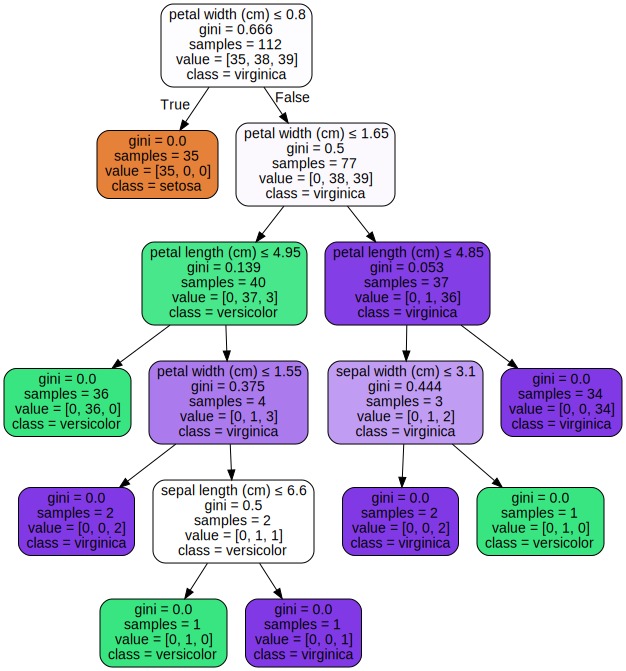

In [7]:
dot_data = export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

### Controlling tree complexity

In [19]:
clf2 = DecisionTreeClassifier(max_depth = 3).fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf2.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf2.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.98
Accuracy of Decision Tree classifier on test set: 0.97


In [20]:
dot_data = export_graphviz(clf2, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

NameError: name 'export_graphviz' is not defined

In [21]:
importances = clf2.feature_importances_

In [22]:
importances

array([0.        , 0.        , 0.56801409, 0.43198591])

In [23]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [24]:
important=pd.DataFrame(clf2.feature_importances_,index=iris.feature_names,columns=['imp'])
important.sort_values(by='imp').plot(kind='barh')

plt.show()

<IPython.core.display.Javascript object>